<a href="https://colab.research.google.com/github/JDaviA/Desafio/blob/main/Transfer_Learning_Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.5744 - loss: 6.7791 - val_accuracy: 0.6317 - val_loss: 0.6674
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 227s 3s/step - accuracy: 0.6303 - loss: 0.6748 - val_accuracy: 0.6683 - val_loss: 0.6506
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.6678 - loss: 0.6595 - val_accuracy: 0.6683 - val_loss: 0.6427
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 222s 3s/step - accuracy: 0.6698 - loss: 0.6371 - val_accuracy: 0.6617 - val_loss: 0.6491
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 223s 3s/step - accuracy: 0.6604 - loss: 0.6599 - val_accuracy: 0.6650 - val_loss: 0.6619
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step - accuracy: 0.6575 - loss: 0.6572 - val_accuracy: 0.6700 - val_loss: 0.6575
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.6706 - loss: 0.6410 - val_accuracy: 0.6650 - val_loss: 0.6546
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.6583 - loss: 0.6529 - val_accuracy: 0.6667 - v

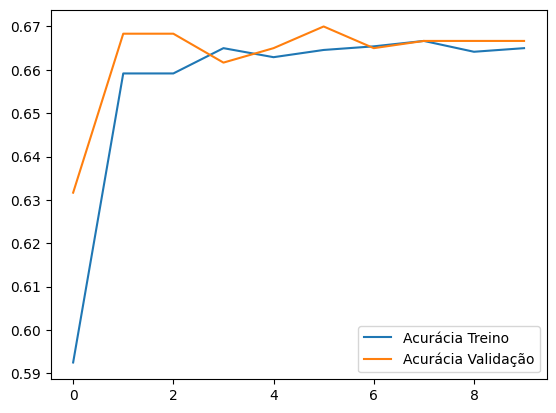

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import urllib.request

dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_path = "/content/dogs-vs-cats.zip"
urllib.request.urlretrieve(dataset_url, dataset_path)

# extrair dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset_cats_dogs")

data_dir = '/content/dataset_cats_dogs/cats_and_dogs_filtered'

time_steps = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(time_steps, time_steps),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(time_steps, time_steps),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(time_steps, time_steps, 3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

model.save('/content/cats_dogs_model.h5')

#curvas de aprendizado
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.legend()
plt.show()
